In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import EarlyStopping
import math
import seaborn as sns

In [2]:
df = pd.read_csv("FourRegionData.csv")
df.head(10)

,Region,Year,Month,SoilTemperature-10,SoilTemperature-30,SoilTemperature-50,Rainfall,Temperature,Min Temperature,Max Temperature,Humidity,Sunshine,Wind Speed,Surface Pressure,Solar Radiation
0,2,2001,1,17.40,18.81,19.43,0,18.38,13.04,25.44,62.68,7.94,2.17,101268.29,199.25
1,2,2001,2,19.88,19.98,20.36,1,22.61,16.90,28.56,61.71,7.19,1.98,101039.08,210.73
2,2,2001,3,24.08,23.32,23.17,33,26.62,20.73,31.84,55.48,8.75,2.10,100882.56,251.75
3,2,2001,4,27.62,27.02,26.77,46,29.06,24.71,32.06,65.63,8.55,2.70,100655.40,257.46
4,2,2001,5,28.54,28.29,28.21,402,27.69,24.18,32.09,77.39,6.10,2.37,100234.63,172.32
5,2,2001,6,30.11,29.82,29.64,386,28.03,25.55,31.75,83.17,3.51,3.64,99934.18,140.45
6,2,2001,7,30.74,30.53,30.64,202,28.83,25.92,31.60,80.26,4.55,3.87,99991.05,169.40
7,2,2001,8,30.99,30.99,30.86,205,29.46,25.23,31.50,82.19,5.15,3.01,100129.68,181.66
8,2,2001,9,29.83,29.89,29.95,209,28.71,24.34,32.42,82.53,4.65,2.14,100499.17,170.22
9,2,2001,10,28.00,28.29,28.50,177,27.63,22.83,31.44,80.45,5.60,1.59,100864.38,167.89


In [3]:
df.describe()

,Region,Year,Month,SoilTemperature-10,SoilTemperature-30,SoilTemperature-50,Rainfall,Temperature,Min Temperature,Max Temperature,Humidity,Sunshine,Wind Speed,Surface Pressure,Solar Radiation
count,1056.00000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000,1056.000000
mean,4.50000,2011.500000,6.500000,27.048911,26.753002,26.674479,147.833333,25.855767,21.290057,30.597367,78.353949,5.755464,2.292803,100662.094602,188.207803
std,1.80363,6.347295,3.453688,4.535854,4.141530,3.841275,160.693275,4.215597,5.181553,4.226878,7.316262,1.891709,0.583342,528.956442,32.363212
min,2.00000,2001.000000,1.000000,16.100000,17.370000,17.640000,0.000000,14.120000,8.360000,3.810000,52.100000,0.000000,1.240000,99447.650000,107.480000
25%,3.50000,2006.000000,3.750000,23.340000,23.312500,23.307500,7.000000,22.712500,16.972500,28.887500,74.175000,4.537500,1.830000,100185.972500,165.687500
50%,4.50000,2011.500000,6.500000,28.895000,28.235000,27.950000,96.000000,27.760000,23.315000,31.995000,80.000000,5.900000,2.160000,100683.545000,181.160000
75%,5.50000,2017.000000,9.250000,30.830000,30.142500,29.832500,242.500000,29.120000,25.922500,33.160000,83.732500,7.070000,2.692500,101156.590000,208.437500
max,7.00000,2022.000000,12.000000,34.130000,33.890000,33.310000,849.000000,32.100000,30.420000,38.460000,93.840000,20.350000,4.280000,101603.720000,288.600000


In [4]:
df.columns

Index(['Region', 'Year', 'Month', 'SoilTemperature-10', 'SoilTemperature-30',
       'SoilTemperature-50', 'Rainfall', 'Temperature', 'Min Temperature',
       'Max Temperature', 'Humidity', 'Sunshine', 'Wind Speed',
       'Surface Pressure', 'Solar Radiation'],
      dtype='object')

In [5]:
df.shape

(1056, 15)

## We remove all the outlier using capping method 
### The columns on where we used capping : Humidity,Solar Radiation, Sunshine,Rainfall,Max Temperature

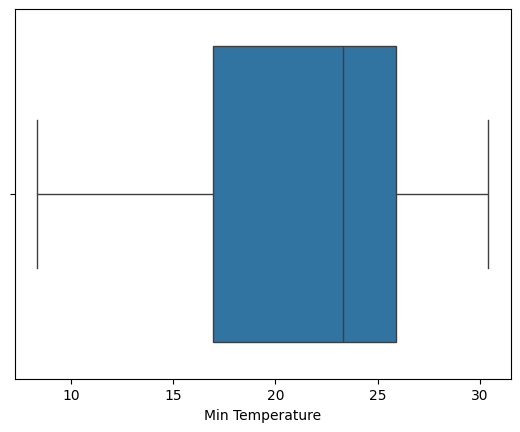

In [6]:
sns.boxplot(x=df['Min Temperature'])
plt.show()

In [47]:
# upper_limit = df['Max Temperature'].quantile(0.98)
# lower_limit = df['Max Temperature'].quantile(0.02)

# # Cap the values
# df['Max Temperature'] = np.clip(df['Max Temperature'], lower_limit, upper_limit)

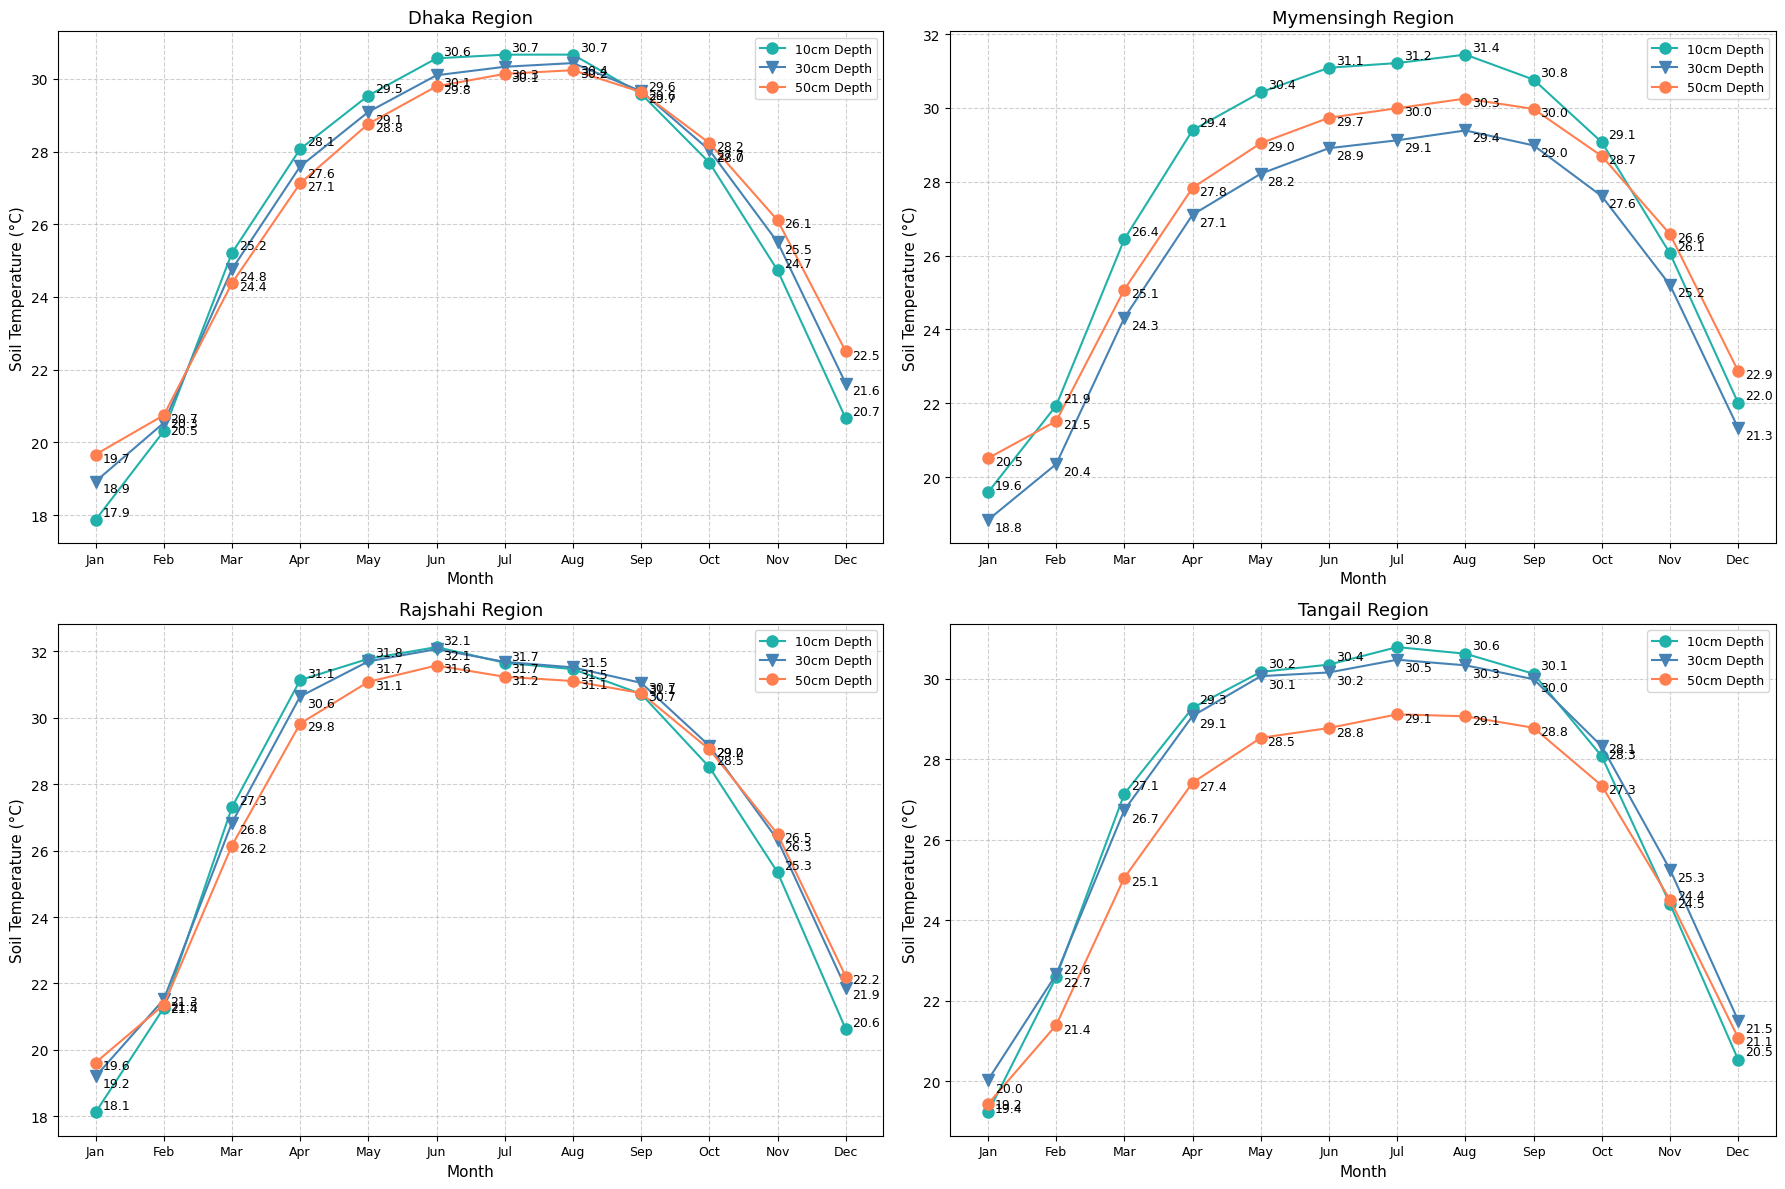

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import FixedLocator

data = pd.read_csv('FourRegionData.csv')

regions = [2, 4, 5, 7]
region_names = {
    2: "Dhaka Region",
    4: "Mymensingh Region",
    5: "Rajshahi Region",
    7: "Tangail Region"
}

plot_series = [
    {
        'data_col': 'SoilTemperature-10',
        'color': 'lightseagreen',
        'marker': 'o',
        'label': '10cm Depth',
        'offset_y': 0.2,
        'offset_x': 0.1,
    },
    {
        'data_col': 'SoilTemperature-30',
        'color': 'steelblue',
        'marker': 'v',
        'label': '30cm Depth',
        'offset_y': -0.2,
        'offset_x': 0.1,
    },
    {
        'data_col': 'SoilTemperature-50',
        'color': 'coral',
        'marker': 'o',
        'label': '50cm Depth',
        'offset_y': -0.1,
        'offset_x': 0.1,
    },
]


fig, axs = plt.subplots(2, 2, figsize=(18, 12))
axs = axs.flatten()

for idx, region in enumerate(regions):
    df = data[data['Region'] == region]
    monthly_avg_temp = df.groupby('Month')[
        ['SoilTemperature-10', 'SoilTemperature-30', 'SoilTemperature-50']
    ].mean().reset_index()

    ax = axs[idx]
    
    for series in plot_series:
        ax.plot(
            monthly_avg_temp['Month'],
            monthly_avg_temp[series['data_col']],
            color=series['color'],
            marker=series['marker'],
            linestyle='-',
            markersize=8,
            label=series['label']
        )

        for i, txt in enumerate(monthly_avg_temp[series['data_col']]):
            ax.text(
                monthly_avg_temp['Month'][i] + series['offset_x'],
                txt + series['offset_y'],
                f'{txt:.1f}',
                fontsize=9,
                color='black',
                ha='left',
                va='center',
            )

    ax.set_title( f'{region_names[region]}', fontsize=13)
    ax.set_xlabel('Month', fontsize=11)
    ax.set_ylabel('Soil Temperature (°C)', fontsize=11)
    ax.xaxis.set_major_locator(FixedLocator(range(1, 13)))
    ax.set_xticks(range(1, 13))
    ax.set_xticklabels(['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], fontsize=9)
    ax.grid(True, linestyle='--', alpha=0.6)
    ax.legend(fontsize=9)

plt.tight_layout()
plt.savefig('Monthly Soil Temperature by Regions.png', dpi=300)
plt.show()


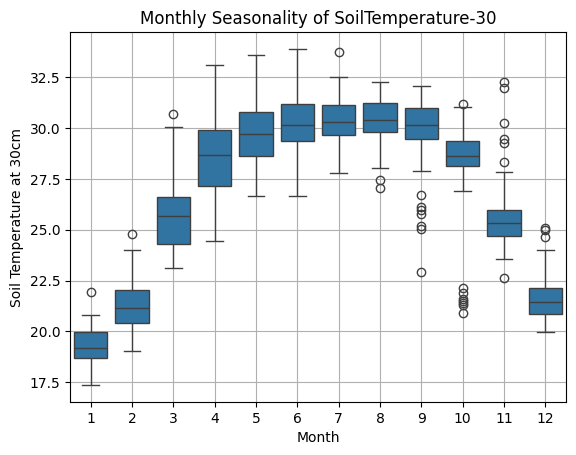

In [8]:
import seaborn as sns

sns.boxplot(x='Month', y='SoilTemperature-30', data=df)
plt.title('Monthly Seasonality of SoilTemperature-30')
plt.xlabel('Month')
plt.ylabel('Soil Temperature at 30cm')
plt.grid(True)
plt.show()


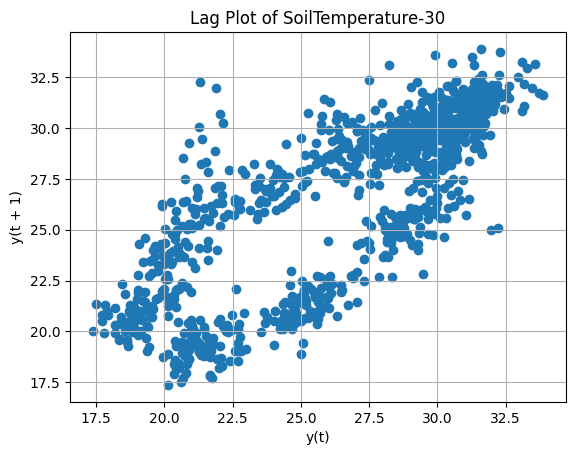

In [9]:
from pandas.plotting import lag_plot

lag_plot(df['SoilTemperature-30'])
plt.title('Lag Plot of SoilTemperature-30')
plt.grid(True)
plt.show()



In [69]:

df['Solar Radiation'] = df['Solar Radiation'].shift(1)

# Step 2: Drop rows with NaN (from lagging)
df = df.dropna(subset=['Solar Radiation'])


In [70]:
# df.to_csv("Final Dataset.csv",index=False)

C:\Users\HP Laptop 15\AppData\Local\Temp\ipykernel_25092\855883902.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SoilTemp30_SMA'] = df['SoilTemperature-30'].rolling(window=12).mean()


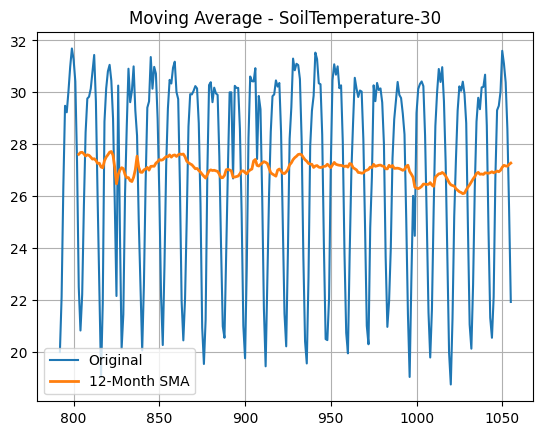

In [7]:
df['SoilTemp30_SMA'] = df['SoilTemperature-30'].rolling(window=12).mean()
plt.plot(df['SoilTemperature-30'], label='Original')
plt.plot(df['SoilTemp30_SMA'], label='12-Month SMA', linewidth=2)
plt.legend()
plt.title("Moving Average - SoilTemperature-30")
plt.grid(True)
plt.show()


In [11]:

# features = df[[ 'Year', 'Month', 'Temperature', 'Min Temperature',
#        'Max Temperature', 'Wind Speed','Sunshine','Solar Radiation','Humidity']]
# target = df['SoilTemperature-10']

# scaler = StandardScaler()
# scaled_features = scaler.fit_transform(features)


# target_scaler = MinMaxScaler()
# scaled_target = target_scaler.fit_transform(target.values.reshape(-1, 1))


# def create_sliding_window(X, y, window_size):
#     Xs, ys = [], []
#     for i in range(len(X) - window_size):
#         Xs.append(X[i:i+window_size])
#         ys.append(y[i+window_size])
#     return np.array(Xs), np.array(ys)

# window_size = 12
# X_seq, y_seq = create_sliding_window(scaled_features, scaled_target, window_size)
# X_train, X_test, y_train, y_test = train_test_split(X_seq, y_seq, test_size=0.2, random_state=2)


# def r2_score(y_true, y_pred):
#     ss_res = K.sum(K.square(y_true - y_pred))
#     ss_tot = K.sum(K.square(y_true - K.mean(y_true)))
#     return 1 - ss_res / (ss_tot + K.epsilon())

# model = Sequential([
#     LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
#     LSTM(32, activation='tanh',return_sequences=True),
#     LSTM(32,activation='tanh',return_sequences=False),
#     Dense(64, activation='relu'),
#     Dropout(0.2),
#     Dense(1)
# ])

# model.compile(optimizer=Adam(), loss='mse', metrics=[r2_score, 'mae'])

# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# history = model.fit(
#     X_train, y_train,
#     epochs=50,
#     batch_size=32,
#     validation_data=(X_test, y_test),
#     callbacks=[early_stop]
# )



# loss, r2, mae = model.evaluate(X_test, y_test)
# print(f"Test Loss (MSE): {loss:.4f}")
# print(f"Test R² Score: {r2:.4f}")
# print(f"Test MAE: {mae:.4f}")


# predictions = model.predict(X_test)


# predictions_rescaled = target_scaler.inverse_transform(predictions)
# y_test_rescaled = target_scaler.inverse_transform(y_test)


# comparison = pd.DataFrame({
#     'Predicted': predictions_rescaled.flatten(),
#     'Actual': y_test_rescaled.flatten()
# })
# print(comparison.head(14))


In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd


features = df[['Month', 'Temperature', 'Min Temperature',
               'Max Temperature', 'Surface Pressure']]
target = df['SoilTemperature-50']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

target_scaler = MinMaxScaler()
y_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))


def create_sliding_window(X, y, window_size):
    Xs, ys = [], []
    for i in range(len(X) - window_size):
        Xs.append(X[i:i+window_size])
        ys.append(y[i+window_size])
    return np.array(Xs), np.array(ys)

WINDOW = 3
X_seq, y_seq = create_sliding_window(X_scaled, y_scaled, WINDOW)

total_samples = len(X_seq)
train_end = int(0.7 * total_samples)
val_end = int(0.85 * total_samples)

X_train, y_train = X_seq[:train_end], y_seq[:train_end]
X_val, y_val = X_seq[train_end:val_end], y_seq[train_end:val_end]
X_test, y_test = X_seq[val_end:], y_seq[val_end:]

model = Sequential([
    LSTM(64, activation='tanh', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=True),
    Dropout(0.2),
    LSTM(32, activation='tanh', return_sequences=False),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(1)
])

model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
checkpoint = ModelCheckpoint('best_model.h5', monitor='val_loss', save_best_only=True, mode='min')
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=1e-6)

history = model.fit(
    X_train, y_train,
    epochs=100, 
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[early_stop, checkpoint, lr_scheduler]
)

results = model.evaluate(X_test, y_test, verbose=0)
loss = results[0]
mae = results[1]
print(f"Test Loss (MSE): {loss:.4f}")
print(f"Test MAE:       {mae:.4f}")


y_pred_scaled = model.predict(X_test)
y_pred        = target_scaler.inverse_transform(y_pred_scaled)
y_true        = target_scaler.inverse_transform(y_test)

comparison = pd.DataFrame({
    'Predicted': y_pred.flatten(),
    'Actual':    y_true.flatten()
})
print(comparison.head(14))


Epoch 1/100
6/6 [==============================] - 7s 265ms/step - loss: 0.4760 - mae: 0.6357 - val_loss: 0.3826 - val_mae: 0.5628 - lr: 0.0010
Epoch 2/100
1/6 [====>.........................] - ETA: 0s - loss: 0.3538 - mae: 0.5215

C:\Users\HP Laptop 15\tfenv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


6/6 [==============================] - 0s 33ms/step - loss: 0.4032 - mae: 0.5785 - val_loss: 0.3094 - val_mae: 0.4998 - lr: 0.0010
Epoch 3/100
6/6 [==============================] - 0s 34ms/step - loss: 0.3169 - mae: 0.5037 - val_loss: 0.2158 - val_mae: 0.4104 - lr: 0.0010
Epoch 4/100
6/6 [==============================] - 0s 35ms/step - loss: 0.2063 - mae: 0.3961 - val_loss: 0.1024 - val_mae: 0.2770 - lr: 0.0010
Epoch 5/100
6/6 [==============================] - 0s 35ms/step - loss: 0.0824 - mae: 0.2435 - val_loss: 0.0223 - val_mae: 0.1253 - lr: 0.0010
Epoch 6/100
6/6 [==============================] - 0s 22ms/step - loss: 0.0338 - mae: 0.1478 - val_loss: 0.0511 - val_mae: 0.1901 - lr: 0.0010
Epoch 7/100
6/6 [==============================] - 0s 19ms/step - loss: 0.0313 - mae: 0.1455 - val_loss: 0.0230 - val_mae: 0.1025 - lr: 0.0010
Epoch 8/100
6/6 [==============================] - 0s 36ms/step - loss: 0.0220 - mae: 0.1188 - val_loss: 0.0129 - val_mae: 0.0894 - lr: 0.0010
Epoch 9/100

In [ ]:
WINDOW=12
Test Loss (MSE): 0.0069
Test MAE:       0.0669

WINDOW=9
Test Loss (MSE): 0.0067
Test MAE:       0.0689

WINDOW=6
Test Loss (MSE): 0.0095
Test MAE:       0.0758

WINDOW=3
Test Loss (MSE): 0.0049
Test MAE:       0.0561

 with using rainfall
 Test Loss (MSE): 0.0057
 Test MAE: 0.0570 


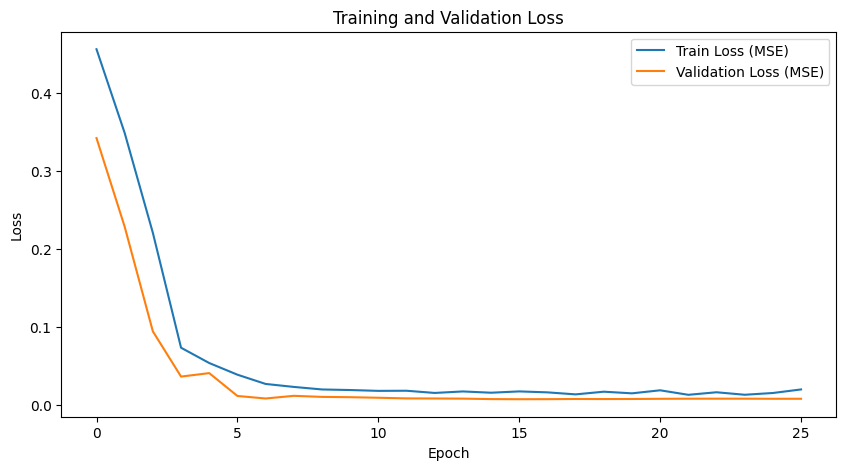

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Train Loss (MSE)')
plt.plot(history.history['val_loss'], label='Validation Loss (MSE)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

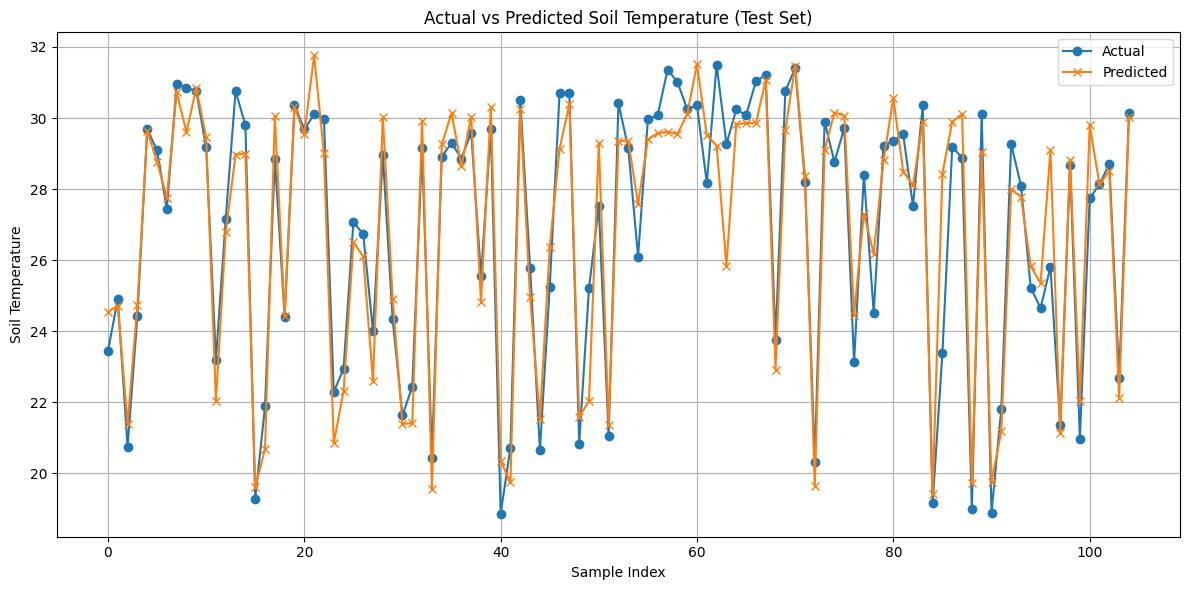

In [21]:


plt.figure(figsize=(12, 6))
plt.plot(comparison['Actual'].values, label='Actual', marker='o')
plt.plot(comparison['Predicted'].values, label='Predicted', marker='x')
plt.title('Actual vs Predicted Soil Temperature (Test Set)')
plt.xlabel('Sample Index')
plt.ylabel('Soil Temperature')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


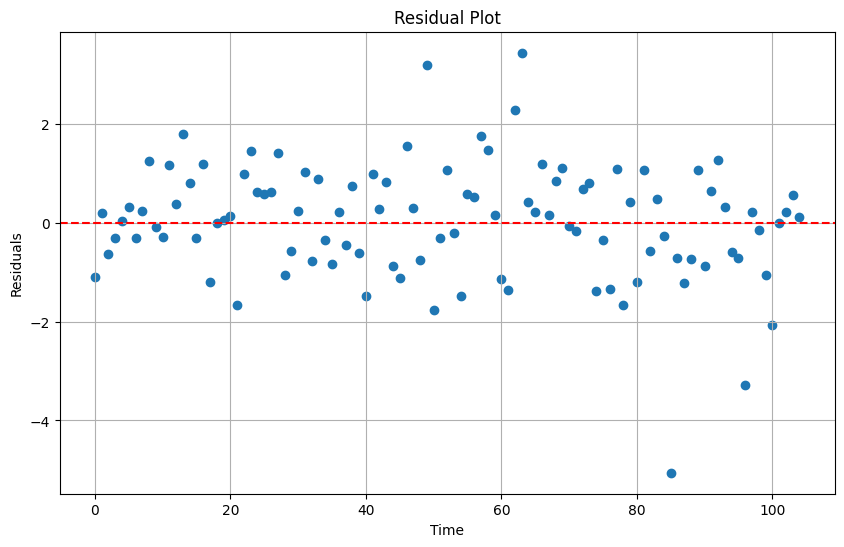

In [22]:
residuals = y_true - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title('Residual Plot')
plt.xlabel('Time')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()
